In [2]:
import pandas as pd
acc_raw = pd.read_csv(f'accidents_Berlin_2021.csv')

In [3]:
acc = acc_raw.copy()
#solo bici
acc_b=acc[acc['InvolvingBike']==1]

In [4]:
acc

,ObjectID,State,District,LOR_ab_2021,AccidentYear,AccidentMonth,AccidentHour,DayOfWeek,AccidentCategory,AccidentType,...,InvolvingCar,InvolvingPedestrian,InvolvingMotorcycle,InvolvingHGV,InvolvingOther,RoadCondition,GraphicCoord1,GraphicCoord2,LongitudeWGS84,LatitudeWGS84
0,219249,11,3,3701658.0,2021,11,18,2,3,0,...,1,0,1,0,0,1,"800202,0742","5829640,204",13.426895,52.533940
1,219248,11,7,7501134.0,2021,12,19,7,3,6,...,1,1,0,0,0,1,"798479,5317","5819049,219",13.392090,52.439951
2,219247,11,4,4100101.0,2021,12,17,4,3,5,...,1,0,0,0,0,0,"793352,6128","5829680,195",13.326242,52.538028
3,219246,11,4,4501041.0,2021,12,15,7,3,5,...,1,0,1,0,0,1,"792950,0395","5825362,081",13.316521,52.499534
4,219243,11,11,11501339.0,2021,12,9,5,3,3,...,1,0,0,0,1,2,"807182,01","5825602,793",13.525752,52.493867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,112174,11,4,4300414.0,2021,3,16,4,3,6,...,1,1,0,0,0,1,"791505,4105","5826555,664",13.296345,52.511008
11263,111541,11,4,4400726.0,2021,1,1,6,3,9,...,1,0,0,0,0,0,"791154,679","5824616,757",13.289496,52.493813
11264,110370,11,3,2400520.0,2021,1,20,1,3,3,...,1,0,0,0,0,1,"799988,2122","5828912,431",13.423095,52.527534
11265,109998,11,7,7300619.0,2021,1,14,7,3,2,...,1,0,0,0,0,1,"796018,2589","5822739,196",13.359259,52.474367


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the converted GeoJSON file
gdf = gpd.read_file('bike_lanes_Berlin.geojson')

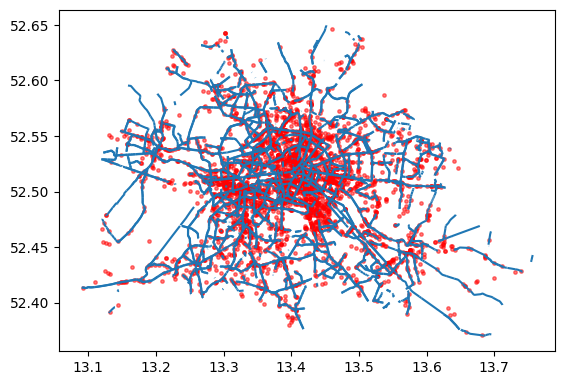

In [21]:
# Plot the data
gdf.plot()
coord=np.array(acc_b[['LongitudeWGS84','LatitudeWGS84']])
plt.scatter(coord[:,0],coord[:,1],color='red',s=6,alpha=0.5)
plt.show()

In [22]:
coord

array([[13.30791309, 52.48845278],
       [13.37669957, 52.50827479],
       [13.17922829, 52.54864203],
       ...,
       [13.60629112, 52.50495334],
       [13.45904954, 52.49285035],
       [13.38900556, 52.49484111]])

In [52]:
strada = gdf.iloc[0]
strada

gml_id                                         b_radverkehrsanlagen.1
subject_code                                                10-000415
segment                                          58530025_58530021.01
segment_district                                                B1/B5
station_street                                          Alt-Kaulsdorf
storage_name                                      Marzahn-Hellersdorf
location                                                    Kaulsdorf
lane_type                                                   bike path
length_in_m                                                      26.0
use_mandatory                                                     yes
geometry            MULTILINESTRING ((13.581988763382206 52.505047...
Name: 0, dtype: object

In [54]:
strada1=gdf.geometry[0]
from shapely.geometry import Point
point=np.zeros((len(coord),1),dtype=Point)
dist1=np.zeros((len(coord),1))
pres1=np.zeros((len(coord),1))
for i in range(len(coord)):
    point[i] = Point(coord[i])
    dist1[i]=strada1.distance(point[i])
dist1

#Plot strada1
gdf.iloc[0].plot()

plt.scatter(coord[:,0],coord[:,1],color='red',s=6,alpha=0.5)
plt.show

print(dist1)



TypeError: no numeric data to plot